# 02 PyTorch Linear Regression From Scratch

In [4]:
% reset -f
from __future__ import print_function
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]
__pyTorch VERSION: 0.1.12+4eb448a
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61
__CUDNN VERSION: 5110
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


# Pure Python

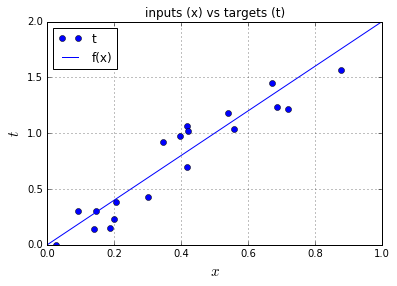

In [2]:
# Python imports
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
numpy.random.seed(seed=1)

# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = numpy.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

In [5]:
from __future__ import print_function
import torch

In [9]:
x=torch.Tensor(3,2)
print (type(x))
print (x)

<class 'torch.FloatTensor'>

1.00000e-11 *
  7.5736  0.0000
  0.0000  0.0000
  0.0000  0.0000
[torch.FloatTensor of size 3x2]



In [13]:
x=torch.rand(3,4)
print (type(x))
print (x)

<class 'torch.FloatTensor'>

 0.7282  0.0462  0.5894  0.0499
 0.0362  0.4119  0.3851  0.8335
 0.9614  0.2754  0.1199  0.7984
[torch.FloatTensor of size 3x4]



In [22]:
print (x[1:])


 0.0362  0.4119  0.3851  0.8335
 0.9614  0.2754  0.1199  0.7984
[torch.FloatTensor of size 2x4]



In [24]:
x.numpy()

array([[ 0.72824687,  0.04616314,  0.58937216,  0.04987642],
       [ 0.03621524,  0.41189733,  0.38509831,  0.83347869],
       [ 0.96142983,  0.275419  ,  0.11985757,  0.79838747]], dtype=float32)

In [27]:
if torch.cuda.is_available():
    x = x.cuda()*2 
    
print (type(x))
print (x)

<class 'torch.cuda.FloatTensor'>

 2.9130  0.1847  2.3575  0.1995
 0.1449  1.6476  1.5404  3.3339
 3.8457  1.1017  0.4794  3.1935
[torch.cuda.FloatTensor of size 3x4 (GPU 0)]

